In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
data_dir = '../datasets/DeepCNNImageClassifier'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, image_class)):
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))
                # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile


In [342]:
data = tf.keras.utils.image_dataset_from_directory('../datasets/DeepCNNImageClassifier')

Found 170 files belonging to 2 classes.


In [343]:
data_iterator = data.as_numpy_iterator()

In [344]:
# Get another batch from the iterator
batch = data_iterator.next()

2024-05-08 01:33:16.556392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


In [345]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [346]:
# Results (CLASS 1 = SAD PEOPLE CLASS 0 = HAPPY PEOPLE)
batch[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int32)

In [1]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

NameError: name 'plt' is not defined

In [348]:
scaled = batch[0] / 255

In [349]:
data = data.map(lambda x, y: (x / 255, y))

In [350]:
scaled_iterator = data.as_numpy_iterator()

In [351]:
batch = scaled_iterator.next()

2024-05-08 01:33:17.505138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


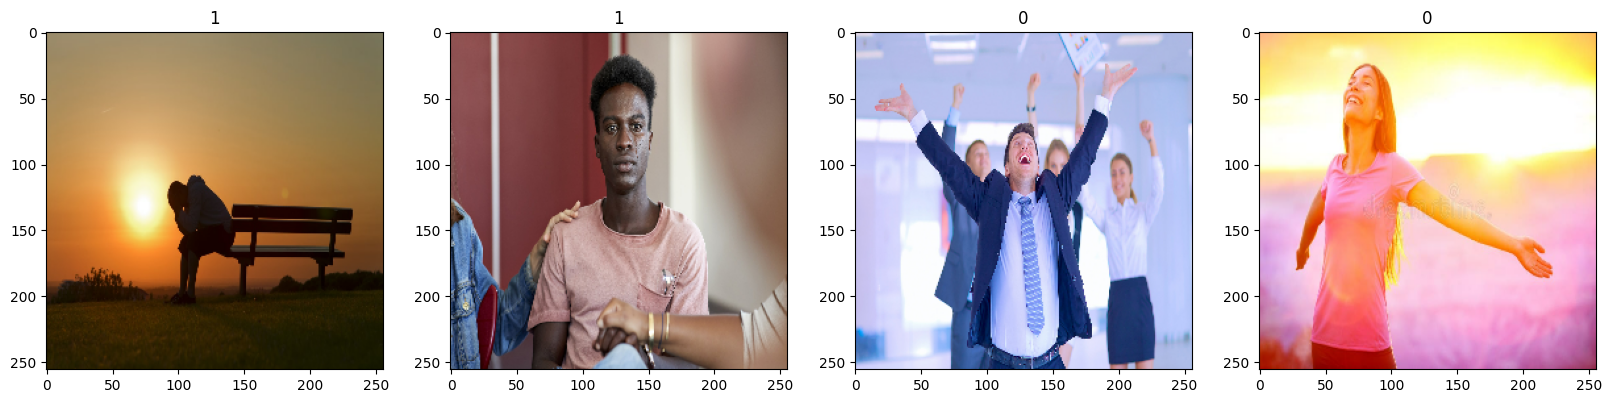

In [352]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [353]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1) + 1

In [354]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [355]:
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [356]:
logdir = 'logs'

In [357]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [358]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20


2024-05-08 01:33:18.956420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.4896 - loss: 1.1361

2024-05-08 01:33:20.496285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 0.4792 - loss: 1.2000 - val_accuracy: 0.5625 - val_loss: 0.6381
Epoch 2/20


2024-05-08 01:33:21.008842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.5612 - loss: 0.6998

2024-05-08 01:33:22.163565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 0.5615 - loss: 0.7014 - val_accuracy: 0.5625 - val_loss: 0.6273
Epoch 3/20


2024-05-08 01:33:22.720541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.6165 - loss: 0.6031

2024-05-08 01:33:23.891285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 396ms/step - accuracy: 0.6167 - loss: 0.6020 - val_accuracy: 0.5625 - val_loss: 0.6929
Epoch 4/20


2024-05-08 01:33:24.541818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.6517 - loss: 0.6033

2024-05-08 01:33:25.791471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 0.6448 - loss: 0.6121 - val_accuracy: 0.5000 - val_loss: 0.6829
Epoch 5/20


2024-05-08 01:33:26.139742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7135 - loss: 0.5787

2024-05-08 01:33:27.800658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 455ms/step - accuracy: 0.7177 - loss: 0.5732 - val_accuracy: 0.7500 - val_loss: 0.4279
Epoch 6/20


2024-05-08 01:33:28.234792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.6901 - loss: 0.5093

2024-05-08 01:33:29.868019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - accuracy: 0.6896 - loss: 0.5063 - val_accuracy: 0.8438 - val_loss: 0.3868
Epoch 7/20


2024-05-08 01:33:30.362121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.8177 - loss: 0.4466

2024-05-08 01:33:31.692552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - accuracy: 0.8167 - loss: 0.4465 - val_accuracy: 0.8438 - val_loss: 0.4187
Epoch 8/20


2024-05-08 01:33:32.230187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.8522 - loss: 0.3732

2024-05-08 01:33:33.589457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step - accuracy: 0.8521 - loss: 0.3698 - val_accuracy: 0.9062 - val_loss: 0.2770
Epoch 9/20


2024-05-08 01:33:34.141903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.8223 - loss: 0.3906

2024-05-08 01:33:35.391472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 388ms/step - accuracy: 0.8250 - loss: 0.3801 - val_accuracy: 0.9688 - val_loss: 0.1923
Epoch 10/20


2024-05-08 01:33:35.754949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.9206 - loss: 0.2156

2024-05-08 01:33:37.270050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 457ms/step - accuracy: 0.9177 - loss: 0.2224 - val_accuracy: 0.8750 - val_loss: 0.1939
Epoch 11/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step - accuracy: 0.9062 - loss: 0.2794

2024-05-08 01:33:37.992899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.9212 - loss: 0.2516

2024-05-08 01:33:38.927589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 399ms/step - accuracy: 0.9229 - loss: 0.2471 - val_accuracy: 0.9688 - val_loss: 0.1314
Epoch 12/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step - accuracy: 0.9688 - loss: 0.1152

2024-05-08 01:33:39.647106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 387ms/step - accuracy: 0.9719 - loss: 0.1220 - val_accuracy: 0.9688 - val_loss: 0.0970
Epoch 13/20


2024-05-08 01:33:40.859527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-08 01:33:41.056104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9414 - loss: 0.1333

2024-05-08 01:33:42.523172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 0.9438 - loss: 0.1310 - val_accuracy: 0.9688 - val_loss: 0.0600
Epoch 14/20


2024-05-08 01:33:43.082275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9876 - loss: 0.0726

2024-05-08 01:33:44.428323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 448ms/step - accuracy: 0.9854 - loss: 0.0763 - val_accuracy: 1.0000 - val_loss: 0.0790
Epoch 15/20


2024-05-08 01:33:44.969928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9818 - loss: 0.1111

2024-05-08 01:33:46.224509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 435ms/step - accuracy: 0.9823 - loss: 0.1048 - val_accuracy: 0.9688 - val_loss: 0.0443
Epoch 16/20


2024-05-08 01:33:46.689084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.9733 - loss: 0.0690

2024-05-08 01:33:47.988553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 0.9740 - loss: 0.0676 - val_accuracy: 1.0000 - val_loss: 0.0155
Epoch 17/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step - accuracy: 1.0000 - loss: 0.0181

2024-05-08 01:33:48.648852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 394ms/step - accuracy: 1.0000 - loss: 0.0246 - val_accuracy: 1.0000 - val_loss: 0.0119
Epoch 18/20


2024-05-08 01:33:49.808745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-08 01:33:50.156041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.9980 - loss: 0.0248

2024-05-08 01:33:51.485818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 385ms/step - accuracy: 0.9969 - loss: 0.0254 - val_accuracy: 1.0000 - val_loss: 0.0471
Epoch 19/20


2024-05-08 01:33:51.870611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 1.0000 - loss: 0.0160

2024-05-08 01:33:53.015517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 385ms/step - accuracy: 1.0000 - loss: 0.0159 - val_accuracy: 1.0000 - val_loss: 0.0108
Epoch 20/20


2024-05-08 01:33:53.485935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 1.0000 - loss: 0.0128

2024-05-08 01:33:54.828432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 382ms/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 0.0100


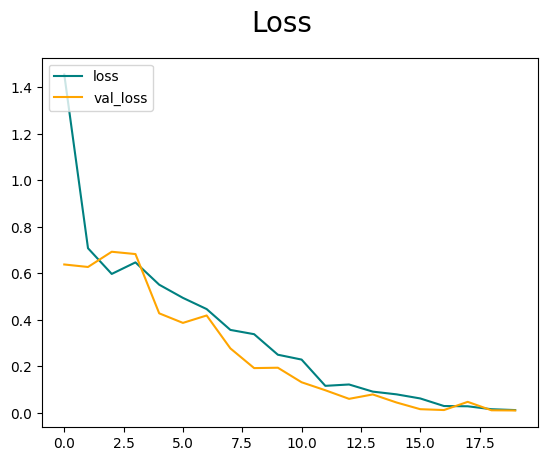

In [359]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

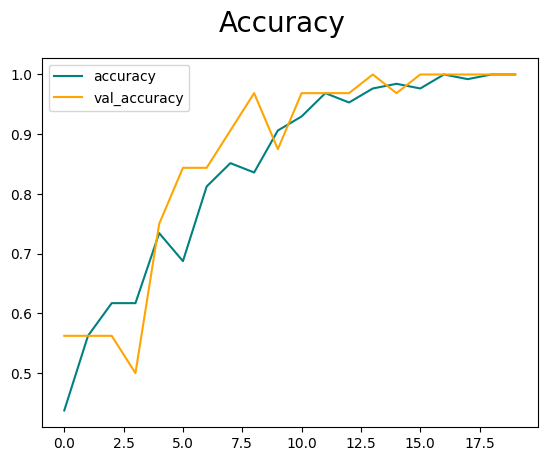

In [360]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [361]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Precision: 1.0, Recall: 1.0, Accuracy: 1.0


2024-05-08 01:33:55.523373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-08 01:33:55.700660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


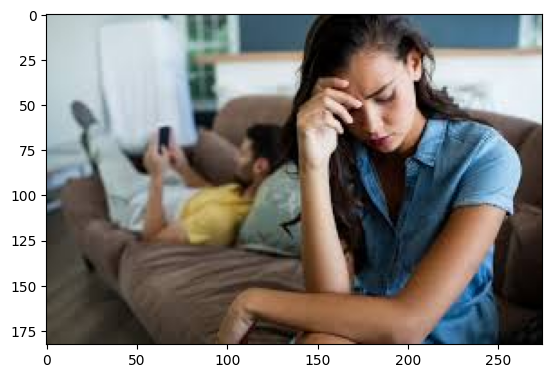

In [362]:
img = cv2.imread('../datasets/DeepCNNImageClassifier/testsad.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

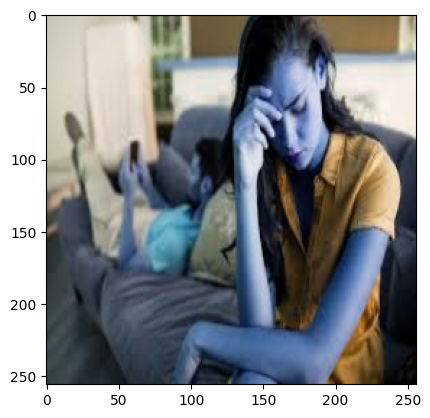

In [363]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [364]:
yhat = model.predict(np.expand_dims(resize / 255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [365]:
yhat

array([[0.8830551]], dtype=float32)

In [366]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is sad


In [367]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [368]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [369]:
yhatnew = new_model.predict(np.expand_dims(resize / 255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [370]:
if yhatnew > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is sad
